### Principal Component Analisys
PCA is perfomred to reduce the dimensionality of the data while retaining most of the variance.
This help in symplifying the dataset, reducing noise and making it easier to visualize and interpret.

In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('csv/final_dataset_cap.csv')
print(data.columns)

# Separate features and response variables
features = data.iloc[:, 2:]
reservoir_T = data['temp_measured']
print(f'\nFeatures of dataset: {features.columns}')
print(f'\nNumber of compenents in features: {features.shape[1]}')

print(f'\n{reservoir_T.head(8)}')

print(reservoir_T.head(10))

Index(['well_sample', 'temp_measured', 'pH', 'Na ', 'K', 'Ca', 'Mg', 'Cl',
       'SO4'],
      dtype='object')

Features of dataset: Index(['pH', 'Na ', 'K', 'Ca', 'Mg', 'Cl', 'SO4'], dtype='object')

Number of compenents in features: 7

0    137
1    137
2    137
3    137
4    150
5    116
6    165
7    140
Name: temp_measured, dtype: int64
0    137
1    137
2    137
3    137
4    150
5    116
6    165
7    140
8    115
9    115
Name: temp_measured, dtype: int64


In [24]:
def data_preprocess(file_path):
    data = pd.read_csv(file_path)

    # Separate features and response variables
    features = data.iloc[:, 2:]
    reservoir_T = data['temp_measured']
    
    # Standardize the features
    scaler = StandardScaler()
    data_std = scaler.fit_transform(features)
    # data_std = features
    return data_std, reservoir_T

def pca_analysis(data_std, n_components):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_std) 

    # Explained variance ratio and cumulative variance
    evr = pca.explained_variance_ratio_
    cev = evr.cumsum()
    return principal_components, evr, cev

def optimal_components(cev, variance_to_keep):
    return np.argmax(cev >= variance_to_keep) + 1

def main():
    data_std, reservoir_T = data_preprocess('csv/final_dataset_power.csv')
    principals_components, evr, cev = pca_analysis(data_std, 7)

    # Determine optimal number of components to keep
    variance_to_keep = 0.99
    num_components = optimal_components(cev, variance_to_keep)

    # Print results
    print(f'\nExplained variance ratio: {evr}')
    print(f'\nNumber of components to keep to explain {variance_to_keep*100}% of variance: {num_components}')

    # Create a DF for principal components
    pca_df = pd.DataFrame(data=principals_components[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])
    print('\n', pca_df.head(10))
    print(f'\nShape of principal components data frame: ', pca_df.shape)

    return variance_to_keep, pca_df, evr, cev

if __name__ == '__main__':
    main()   


Explained variance ratio: [0.7567561  0.11520508 0.05838925 0.04231458 0.01290503 0.01022304
 0.00420691]

Number of components to keep to explain 99.0% of variance: 6

         PC1       PC2       PC3       PC4       PC5       PC6
0  3.050494 -0.639921 -0.016898 -0.272288  0.074119  0.178770
1  3.185844 -0.817350 -0.379400 -0.051929  0.064223  0.130242
2  3.276440 -0.839106 -0.486268  0.039796  0.056197  0.115255
3  3.252881 -0.801771 -0.407197  0.004067  0.063098  0.134919
4  2.481344 -0.755888  0.724952 -1.162071  0.126794  0.289833
5  3.187855 -0.688432 -0.180328 -0.123666  0.136338  0.138196
6  3.204857 -0.905506 -0.475335  0.029357  0.092823  0.022486
7  2.806706  0.048111  0.980101 -0.459861  0.096285  0.284038
8  3.354952  1.176472  0.629347 -0.757756 -0.242140 -0.400609
9  3.349917  1.152700  0.628933 -0.769964 -0.239837 -0.395245

Shape of principal components data frame:  (216, 6)


In [15]:
df = pd.read_csv('csv/final_dataset_log.csv')

# Principal information about the dataset

print('\nColumn Headers:')
for i, col in enumerate(df.columns):
    print(f'{i+1}. {col}')

print('\nFirst 10 rows:\n', df.head(10))
print('\nLast 10 rows:\n', df.tail(10))
print('\nDataset Shape:\n', df.shape)
print('\nColumn Info: ')
print('\n', df.info())

print('\nColumn names:\n', df.columns.tolist())
print('\nData types:\n', df.dtypes)
print('\nMissing values:\n', df.isnull().sum())
print('\nNaN entries:\n', df.isna().sum())
print('\nDuplicates Count:', df.duplicated().sum())

print('\nSummary Statistics:\n', df.describe(include='all').T)

# Drop the first column (sample names)
# df = df.iloc[:, 1:]  # Select all rows and all columns except the first one
# df = df.drop(df.columns[0], axis=1)


Column Headers:
1. well_sample
2. temp_measured
3. pH
4. Na 
5. K
6. Ca
7. Mg
8. Cl
9. SO4

First 10 rows:
    well_sample  temp_measured        pH       Na          K        Ca  \
0   GPK1_KS228            137 -1.122427  1.314631  1.484423  1.373993   
1   GPK1_KD005            137 -1.602609  1.296243  1.469846  1.375382   
2   GPK1_KD006            137 -1.764634  1.311004  1.479179  1.384490   
3   GPK1_KD007            137 -1.667296  1.309181  1.494724  1.383141   
4         EPSI            150  0.015425  1.316435  1.489604  1.427544   
5         4616            116 -1.377457  1.307352  1.501040  1.443133   
6       KP3500            165 -1.756509  1.309181  1.412272  1.399379   
7  Cronenbourg            140  0.015425  1.371165  1.568272  1.268782   
8   Buhl_B2460            115  0.015425  1.739618  0.660914  1.543399   
9   Buhl_B2535            115  0.015425  1.738793  0.668707  1.546059   

         Mg        Cl       SO4  
0  1.035687  1.271608  0.247956  
1  1.024500  1.2613

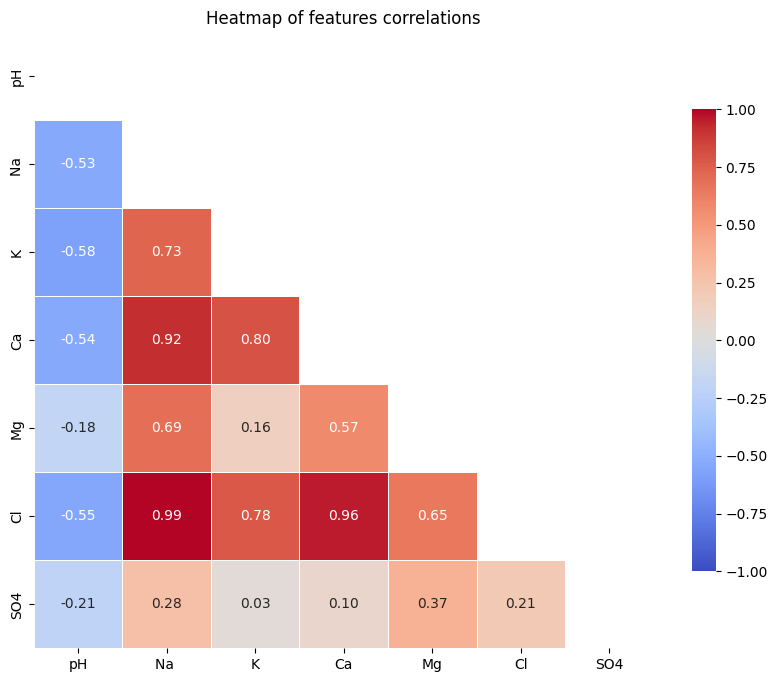

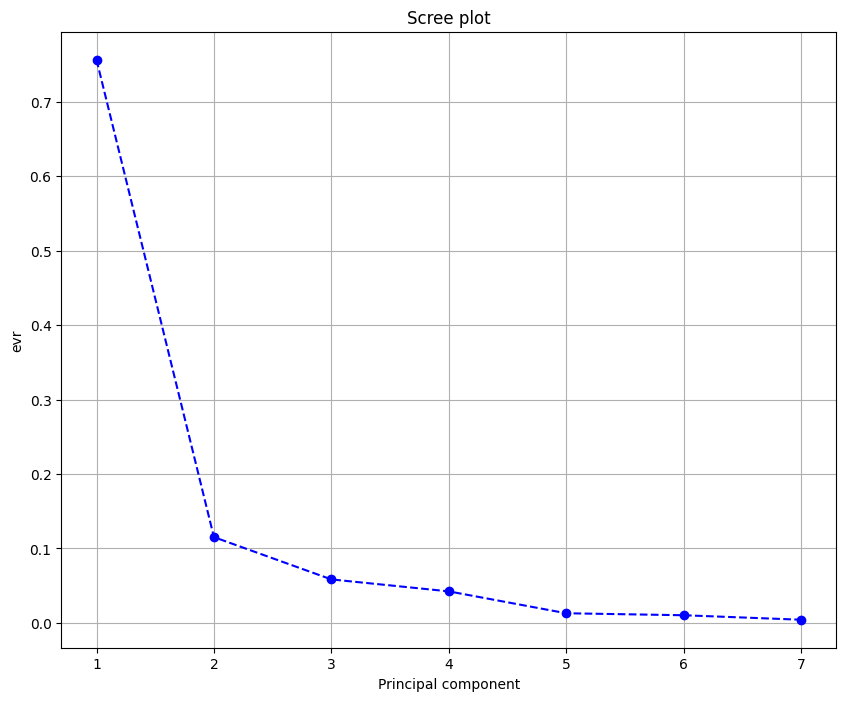

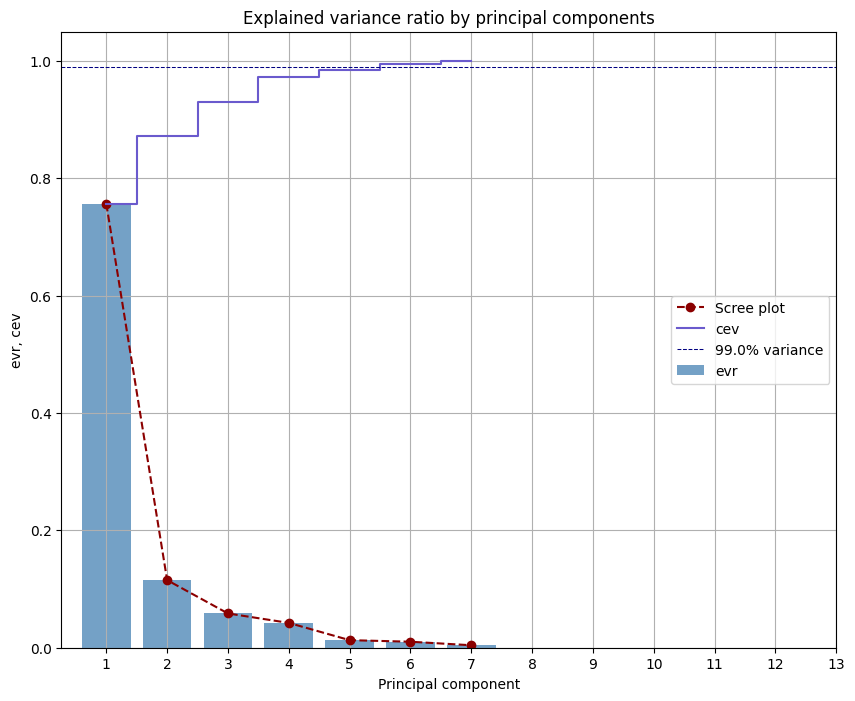

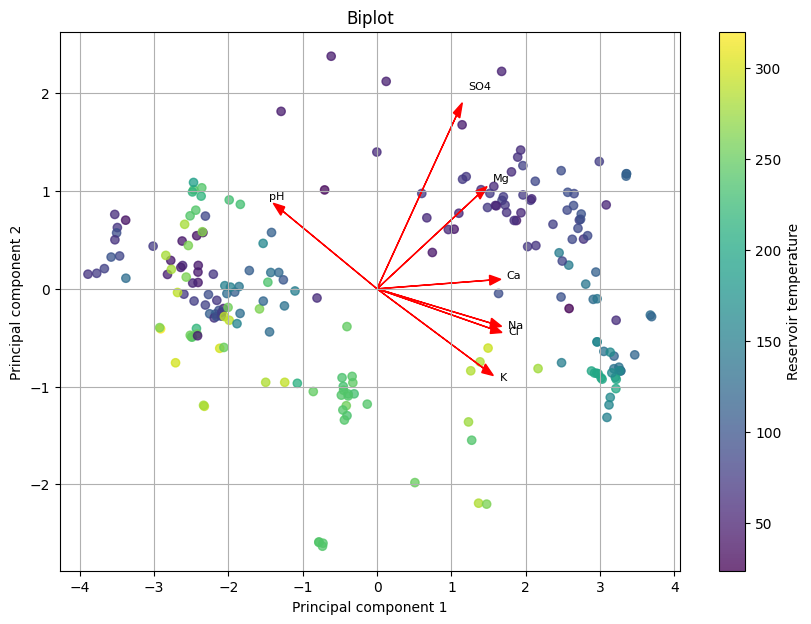

In [25]:
### PCA resultys visualization
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(features):
    correlation_matrix = features.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, vmin=-1, vmax=1, cbar_kws={"shrink": 0.75})
    plt.title('Heatmap of features correlations')
    plt.show()
    plt.close()

def scree_plot(evr):
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, len(evr)+1), evr, marker='o', linestyle='--', color='b')
    plt.title('Scree plot')
    plt.xlabel('Principal component')
    plt.ylabel('evr')
    plt.grid(True)
    plt.show()
    plt.close()

def evr_cev(evr, cev, variance_to_keep):
    plt.figure(figsize=(10, 8))
    plt.bar(range(1, len(evr)+1), evr, alpha=0.75, align='center', label='evr', color='steelblue')
    plt.plot(range(1, len(cev)+1), evr, marker='o', linestyle='--', label='Scree plot', color='darkred')
    plt.step(range(1, len(cev)+1), cev, where='mid', label='cev', color='slateblue')
    plt.axhline(y=variance_to_keep, color='navy', lw=.75, linestyle='dashed', label=f'{variance_to_keep*100}% variance')
    plt.xlabel('Principal component')
    plt.xticks(range(1,14))
    plt.ylabel('evr, cev')
    plt.legend(loc='center right')
    plt.title('Explained variance ratio by principal components')
    plt.grid(True)
    plt.show()

def biplot(principal_components, pca, features, feature_names, reservoir_T):
    # Create a biplot
    plt.figure(figsize=(10, 7))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=reservoir_T, cmap= 'viridis', alpha=0.75)
    plt.colorbar(label='Reservoir temperature')

    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pca.components_[0, i]*max(principal_components[:, 0]), 
                  pca.components_[1, i]*max(principal_components[:, 1]),
                  color='r', head_width=0.1)
        plt.text(pca.components_[0, i]*max(principal_components[:, 0]) * 1.15, 
                 pca.components_[1, i]*max(principal_components[:, 1]) * 1.15, 
                 feature, color='k', fontsize=8, ha='left')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()


def main():
    data_std, reservoir_T = data_preprocess('csv/final_dataset_power.csv')
    principals_components, evr, cev = pca_analysis(data_std, 7)
    variance_to_keep = 0.99

    data = pd.read_csv('csv/final_dataset.csv')
    features = data.iloc[:, 2:]
    feature_names = features.columns
    reservoir_T = data['temp_measured']

    pca = PCA(n_components=7)
    pca.fit(data_std)

    pca_df = pd.DataFrame(data=principals_components, columns=[f'PC{i+1}' for i in range(7)])

    heatmap(features)
    scree_plot(evr)
    evr_cev(evr, cev, variance_to_keep)
    biplot(principals_components, pca, pd.DataFrame(data_std, columns=feature_names), feature_names, reservoir_T)

if __name__ == '__main__':
    main()  